# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
# Import required libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Import Machine Learning libraries
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

In [3]:
df = pd.df = pd.read_csv(r"C:\Users\hp\customer_booking (5).csv", encoding='ISO-8859-1')

df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [63]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [64]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [65]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [66]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [67]:
df.shape

(50000, 14)

In [68]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform route to numbers
df['route'] = le.fit_transform(df['route'])

# Book and transform booking_origin to numbers
df['booking_origin'] = le.fit_transform(df['booking_origin'])

In [69]:
# Encoding Low-Cardinality Variables (One-Hot Encoding)

# Convers sales_channel and trip_type into binary columns
df = pd.get_dummies(df, columns = ['sales_channel', 'trip_type'], drop_first=True)


In [70]:
# Splitting Data

# Define X (the predictive variables), drop the target column
X = df.drop('booking_complete', axis=1)

# Define y (the target variable we want to predict)
y = df['booking_complete']

# Split data: 80% for training, 20% for testing
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shape to verify the split
print(f"Training shape: {X_train.shape}, Tasting shape: {X_test.shape}")

Training shape: (40000, 14), Tasting shape: (10000, 14)


In [71]:
# MODEL TRAINING

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the model using the Training data
print("Training model... this may take a moment. ")
rf_model.fit(X_train, y_train)

Training model... this may take a moment. 


RandomForestClassifier(class_weight='balanced', random_state=42)

In [72]:
# EVALUATION

# Make predictions on the unseen test set
y_pred = rf_model.predict(X_test)

#Print the accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print the Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.8534

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8504
           1       0.56      0.09      0.16      1496

    accuracy                           0.85     10000
   macro avg       0.71      0.54      0.54     10000
weighted avg       0.82      0.85      0.81     10000



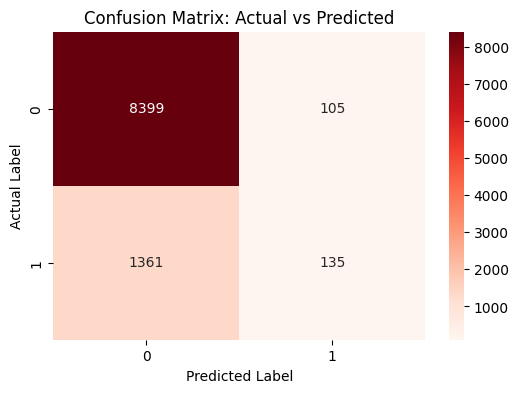

In [73]:
# VISUALIZATION (Confusion Matrix)

# Create a confusion matrix to see True Positives vs False Negatives
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix: Actual vs Predicted')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_11408\242847269.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')


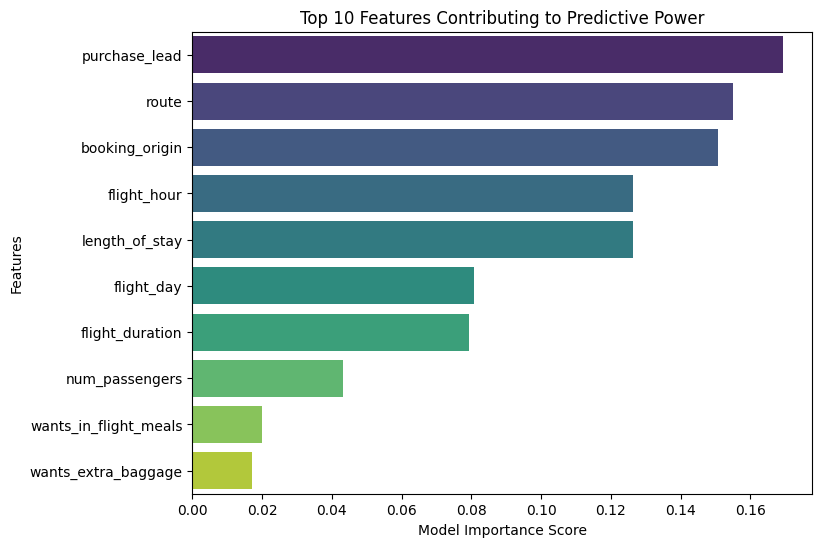

In [74]:
# INTERPRETATION (Feature Importance) 

# Get numerical importance from the model
importances = rf_model.feature_importances_

# Get the names of the columns
features = X.columns

# Create a DataFrame to hold features and their scores
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort the dataframe by importance score (highest to lowest)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the top 10 most important features
plt.figure(figsize=(8, 6))

# Create a bar plot
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')
plt.title('Top 10 Features Contributing to Predictive Power')
plt.xlabel('Model Importance Score')
plt.ylabel('Features')
plt.show()



In [75]:
# Output the top 5 predictive variables to console
print("\nTop 5 Predictive Variables:")
print(importance_df.head(5))


Top 5 Predictive Variables:
          Feature  Importance
1   purchase_lead    0.169281
5           route    0.155087
6  booking_origin    0.150611
3     flight_hour    0.126434
2  length_of_stay    0.126239


In [76]:
# THRESHOLD TUNING 

# Get the raw probabilities instead of just 0 or 1

# predict_proba() returns two columns: [prob_of_0, prob_of_1]
# We take [:, 1] to get the probability of 'Booking Complete'
y_pred_probs = rf_model.predict_proba(X_test)[:, 1]

# Define a lower threshold (e.g., 0.20 instead of the default 0.50)
threshold = 0.20

# Create new predictions based on this lower bar
# If probability > 0.20, classify as 1 (Booking), else 0
y_pred_new_threshold = (y_pred_probs >= threshold).astype(int)

# Evaluate performance with the new threshold
print(f"--- RESULTS WITH LOWER THRESHOLD ({threshold}) ---")
print(classification_report(y_test, y_pred_new_threshold))

# Note: Adjust 'threshold' up or down to find the 'sweet spot' for your business needs.

--- RESULTS WITH LOWER THRESHOLD (0.2) ---
              precision    recall  f1-score   support

           0       0.92      0.76      0.84      8504
           1       0.32      0.63      0.43      1496

    accuracy                           0.74     10000
   macro avg       0.62      0.70      0.63     10000
weighted avg       0.83      0.74      0.77     10000



In [78]:
# PERFORM CROSS-VALIDATION ON ORIGINAL TRAINING DATA

# REQUIRED IMPORTS
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score

# define the variable 'rf_model_cv'
rf_model_cv = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Define Stratified K-Fold cross-validation (K=5 is standard)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("Model and Splitter defined.")

Model and Splitter defined.


In [79]:
# Define scorers focusing on the minority class (Class 1)
scorers = {
    # Specify pos_label=1 to focus metrics on the 'Booking Complete' class
    'recall': make_scorer(recall_score, pos_label=1),
    'precision': make_scorer(precision_score, pos_label=1),
    'f1': make_scorer(f1_score, pos_label=1),
    'accuracy': 'accuracy'
}

print("Scorers dictionary defined.")

Scorers dictionary defined.


In [80]:
# PERFORM CROSS-VALIDATION
print("\nStarting 5-Fold Stratified Cross-Validation...")

cv_results = {}
for name, scorer in scorers.items():
    # This line now successfully uses 'rf_model_cv' and 'scorers'
    scores = cross_val_score(
        rf_model_cv,
        X_train, 
        y_train,
        scoring=scorer,
        cv=skf,
        n_jobs=-1
    )
    cv_results[name] = scores

# OUTPUT AND ANALYSIS
print("\n--- Cross-Validation Results Summary (5 Folds) ---")

for metric, scores in cv_results.items():
    print(f"\n{metric.upper()} Scores:")
    print(f"  Individual Folds: {scores.round(4)}")
    print(f"  Mean Score: {np.mean(scores):.4f}")
    print(f"  Standard Deviation: {np.std(scores):.4f}")


Starting 5-Fold Stratified Cross-Validation...

--- Cross-Validation Results Summary (5 Folds) ---

RECALL Scores:
  Individual Folds: [0.0803 0.0853 0.0844 0.0952 0.0894]
  Mean Score: 0.0869
  Standard Deviation: 0.0051

PRECISION Scores:
  Individual Folds: [0.4948 0.5368 0.5025 0.6    0.5194]
  Mean Score: 0.5307
  Standard Deviation: 0.0375

F1 Scores:
  Individual Folds: [0.1381 0.1472 0.1446 0.1644 0.1525]
  Mean Score: 0.1494
  Standard Deviation: 0.0088

ACCURACY Scores:
  Individual Folds: [0.8502 0.8522 0.8506 0.8551 0.8514]
  Mean Score: 0.8519
  Standard Deviation: 0.0017


C:\Users\hp\AppData\Local\Temp\ipykernel_11408\2752228827.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


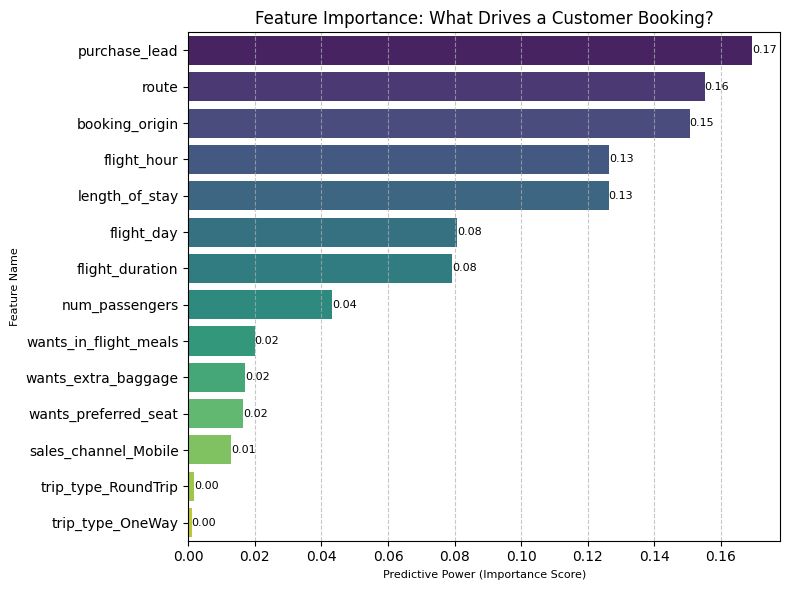

In [82]:
#Visualization Code to generate the interpretation plot
# Fit the model to extract insights
# We use the same configuration as our Cross-Validation (Class Weight = Balanced)
rf_model_cv.fit(X_train, y_train)

# Extract Feature Importances 
# Get the mathematical weight of each feature
importances = rf_model_cv.feature_importances_
feature_names = X.columns

# Create a clean DataFrame for plotting
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualize
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')

# Add labels and titles
plt.title('Feature Importance: What Drives a Customer Booking?', fontsize=12)
plt.xlabel('Predictive Power (Importance Score)', fontsize=8)
plt.ylabel('Feature Name', fontsize=8)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show values on the bars
for index, value in enumerate(feature_importance_df['Importance']):
    plt.text(value, index, f'{value:.2f}', va='center', fontsize=8)

plt.tight_layout()
plt.show()